## Observations and Insights 

In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
data_combined = pd.merge(mouse_metadata, study_results, on = "Mouse ID", how = "outer" )

#Reading the DataFrames


In [4]:
mouse_metadata.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [5]:
study_results.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [6]:
data_combined.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [7]:
# Checking the number of mice in the DataFrame.
nmice = len(data_combined["Mouse ID"].unique())
print(f"There are {nmice} mouse in the DataFrame")

There are 249 mouse in the DataFrame


In [8]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
#data_combined.groupby(["Mouse ID", "Timepoint"]).count()

data_combined = data_combined[data_combined.Timepoint !=0]
#drop_duplicate = data_combined.loc[data_combined.duplicated(subset=["Mouse ID", ]), "Mouse ID"].unique()
#clean_combined = data_combined[data_combined["Mouse ID"].isin(drop_duplicate) ==False]
data_combined

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [9]:
# Optional: Get all the data for the duplicate mouse ID. 

#List o all the duplicate
duplicate_row =data_combined[data_combined.duplicated(["Mouse ID"])]
#print("Duplicate Rows based on a single column are: ", duplicate_row, sep='\n')
duplicate_row2= pd.DataFrame(duplicate_row)
print("Below is the DataFrame containing solo duplicated Mouse ID")
duplicate_row2.head(50)

Below is the DataFrame containing solo duplicated Mouse ID


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
6,k403,Ramicane,Male,21,16,30,31.099498,1
7,k403,Ramicane,Male,21,16,35,26.546993,1
8,k403,Ramicane,Male,21,16,40,24.365505,1
9,k403,Ramicane,Male,21,16,45,22.050126,1
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0


In [10]:
print("Below is the list of all duplicate Mouse ID")
unique_duplicate_id = duplicate_row2["Mouse ID"].unique()
unique_duplicate_id

Below is the list of all duplicate Mouse ID


array(['k403', 's185', 'x401', 'm601', 'g791', 's508', 'f966', 'm546',
       'z578', 'j913', 'u364', 'n364', 'y793', 'r554', 'm957', 'c758',
       't565', 'a644', 'i177', 'j989', 'i738', 'a520', 'w914', 'r811',
       'g288', 'i334', 'q610', 'd251', 'l897', 'c458', 'b742', 'b128',
       'j246', 'a411', 'j119', 'w150', 'v923', 'g316', 's710', 'l509',
       'r944', 'e662', 'u196', 'q597', 'a444', 'i557', 'r921', 'y449',
       'a203', 'a251', 'a262', 'a275', 'a366', 'a401', 'a457', 'a492',
       'a577', 'a685', 'a699', 'a788', 'a818', 'a897', 'a963', 'b313',
       'b487', 'b559', 'b759', 'b879', 'c139', 'c264', 'c282', 'c302',
       'c402', 'c559', 'c580', 'c757', 'c766', 'c819', 'c832', 'c895',
       'c927', 'd164', 'd474', 'e213', 'e227', 'e291', 'e476', 'e584',
       'f129', 'f234', 'f345', 'f436', 'f545', 'f993', 'g107', 'g296',
       'g497', 'g558', 'g570', 'g867', 'g989', 'h246', 'h333', 'i386',
       'i477', 'i635', 'i669', 'i901', 'j235', 'j296', 'j365', 'j755',
      

In [11]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
print(" Here I have my original data, but I am only keeping every first instance of all duplicates")
data_combined.drop_duplicates(subset= "Mouse ID", keep = 'first', inplace = True) 
data_combined

 Here I have my original data, but I am only keeping every first instance of all duplicates


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
1,k403,Ramicane,Male,21,16,5,38.825898,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
21,x401,Capomulin,Female,16,15,5,45.473753,0
31,m601,Capomulin,Male,22,17,5,41.408591,1
41,g791,Ramicane,Male,11,16,5,45.851531,0
...,...,...,...,...,...,...,...,...
1859,z314,Stelasyn,Female,21,28,5,45.934712,0
1861,z435,Propriva,Female,12,26,5,47.115980,0
1864,z581,Infubinol,Female,24,25,5,49.273092,1
1874,z795,Naftisol,Female,13,29,5,46.833475,0


In [12]:
# Checking the number of mice in the clean DataFrame.
Nmice = len(data_combined)
print(f"After cleaning the DataFrame, there are {Nmice} mouse left")

After cleaning the DataFrame, there are 237 mouse left


## Summary Statistics

In [13]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method is the most straightforward, creating multiple series and putting them all together at the end.


In [14]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method produces everything in a single groupby function.

Summary_df = data_combined[["Drug Regimen", "Tumor Volume (mm3)"]].copy()
Summary_count_df = Summary_df.groupby(["Drug Regimen"]).count()
Summary_count_df = Summary_count_df.rename(columns={"Tumor Volume (mm3)": "Count"})
Summary_sum_df = Summary_df.groupby(["Drug Regimen"]).sum()
Summary_sum_df = Summary_sum_df.rename(columns={"Tumor Volume (mm3)": "Sum"})
Summary_median_df = Summary_df.groupby(["Drug Regimen"]).median()
Summary_median_df = Summary_median_df.rename(columns={"Tumor Volume (mm3)": "Median"})
Summary_stdev_df = Summary_df.groupby(["Drug Regimen"]).std()
Summary_stdev_df = Summary_stdev_df.rename(columns={"Tumor Volume (mm3)": "Standar Deviation"})
Summary_sem_df = Summary_df.groupby(["Drug Regimen"]).sem()
Summary_sem_df = Summary_sem_df.rename(columns={"Tumor Volume (mm3)": "SEM"})
Summary = pd.concat([Summary_count_df, Summary_sum_df, Summary_median_df, Summary_stdev_df, Summary_sem_df], axis=1, sort=False)
Summary

,Count,Sum,Median,Standar Deviation,SEM
Drug Regimen,,,,,
Capomulin,25,1106.652160,45.597064,2.242964,0.448593
Ceftamin,21,976.564070,46.370798,0.753856,0.164505
Infubinol,25,1163.531168,46.870483,2.385335,0.477067
Ketapril,23,1089.951014,47.059664,1.270025,0.264819
Naftisol,23,1076.310256,46.621301,0.970606,0.202385
Placebo,24,1131.014141,46.989764,1.068422,0.218091
Propriva,24,1133.653784,47.028497,1.181479,0.241168
Ramicane,25,1098.621485,45.521875,2.414777,0.482955
Stelasyn,23,1091.829098,47.054185,1.222123,0.254830


In [25]:

FINAL_pd = pd.merge(Summary_count_df, Summary_sum_df, on = "Drug Regimen", how = "outer")
FINAL_pd = pd.merge(FINAL_pd, Summary_median_df, on = "Drug Regimen", how = "outer")
FINAL_pd = FINAL_pd.rename(columns={"Tumor Volume (mm3)_x":"Count", "Tumor Volume (mm3)_y":"Sum", "Tumor Volume (mm3)": "Median"})
#Summary_df=Summary_df.describe()
FINAL_pd["Mean"]=FINAL_pd.Sum/FINAL_pd.Count
FINAL_pd = pd.merge(FINAL_pd, Summary_stdev_df, on = "Drug Regimen", how = "outer")
FINAL_pd = FINAL_pd.rename(columns={"Tumor Volume (mm3)":"Standard Deviation"})
FINAL_pd["Variance"]=FINAL_pd["Standar Deviation"]**2
FINAL_pd = pd.merge(FINAL_pd, Summary_sem_df, on = "Drug Regimen", how = "outer")
FINAL_pd = FINAL_pd.rename(columns={"Tumor Volume (mm3)":"SEM"})
FINAL_pd


,Count,Sum,Median,Mean,Standar Deviation,Variance,SEM
Drug Regimen,,,,,,,
Capomulin,25,1106.652160,45.597064,44.266086,2.242964,5.030889,0.448593
Ceftamin,21,976.564070,46.370798,46.503051,0.753856,0.568299,0.164505
Infubinol,25,1163.531168,46.870483,46.541247,2.385335,5.689821,0.477067
Ketapril,23,1089.951014,47.059664,47.389175,1.270025,1.612964,0.264819
Naftisol,23,1076.310256,46.621301,46.796098,0.970606,0.942076,0.202385
Placebo,24,1131.014141,46.989764,47.125589,1.068422,1.141526,0.218091
Propriva,24,1133.653784,47.028497,47.235574,1.181479,1.395893,0.241168
Ramicane,25,1098.621485,45.521875,43.944859,2.414777,5.831150,0.482955
Stelasyn,23,1091.829098,47.054185,47.470830,1.222123,1.493585,0.254830


## Bar Plots

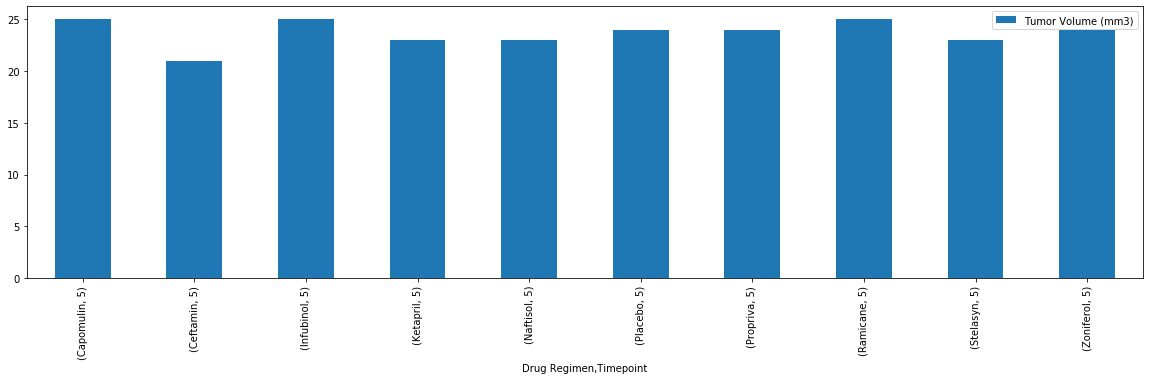

In [26]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pandas.
bar_df = data_combined[["Drug Regimen", "Tumor Volume (mm3)","Timepoint"]].copy()
bar_df=bar_df.groupby(["Drug Regimen", "Timepoint"]).count()
bar_df.plot(kind="bar", figsize=(20,5))

Text(0.5, 1.0, ' Number of mice per time point for each treatment')

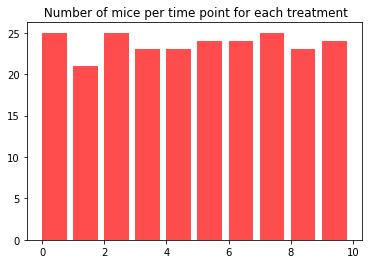

In [27]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pyplot.

bar_df = data_combined[["Drug Regimen", "Tumor Volume (mm3)","Timepoint"]].copy()
bar_df=bar_df.groupby(["Drug Regimen", "Timepoint"]).count()
x = np.arange(len(bar_df))
plt.bar(x, bar_df["Tumor Volume (mm3)"], color='r', alpha=0.7, align="edge")
plt.title(" Number of mice per time point for each treatment")


## Pie Plots

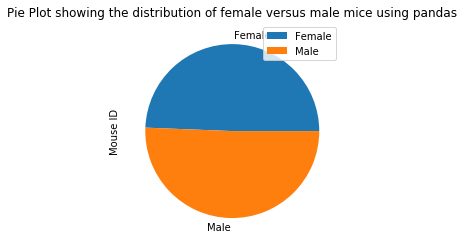

In [28]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
sex_pd = data_combined[["Sex", "Mouse ID"]].copy()
#sex_pd.head()
sex_pd= sex_pd.groupby(["Sex"]).count()
sex_pd.plot(kind="pie", subplots=True)
plt.title("Pie Plot showing the distribution of female versus male mice using pandas")
plt.show()

([<matplotlib.patches.Wedge at 0x1afed872e48>,
 [Text(-1.0997825623841966, 0.021870424679261244, 'Female'),
  Text(1.1497726788562055, -0.02286453489195508, 'Male')],
 [Text(-0.5998813976641071, 0.011929322552324314, '49.4%'),
  Text(0.649871514136116, -0.012923432765018087, '50.6%')])

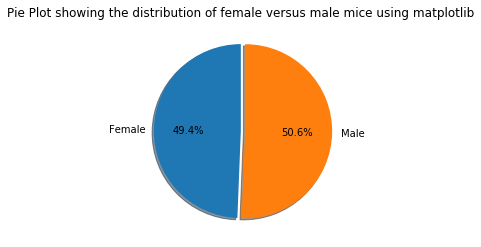

In [29]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
sex_pd = data_combined[["Sex", "Mouse ID"]].copy()
sex_pd.head()
sex_pd= sex_pd.groupby(["Sex"]).count()
sex_pd
labels = 'Female', 'Male'
sizes = [15, 30, 45, 10]
plt.title("Pie Plot showing the distribution of female versus male mice using matplotlib")
explode = (0, 0.05)  # only "explode" the 2nd slice (i.e. 'Hogs')
plt.pie(sex_pd["Mouse ID"], explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)

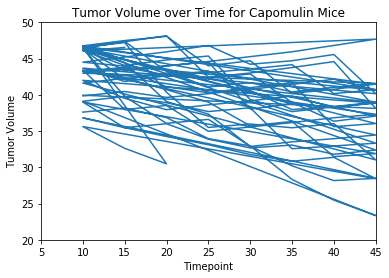

In [30]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
# Filter original data for just the Capomulin Drug Regime
Capomulin_df = duplicate_row2.loc[(duplicate_row2["Drug Regimen"] == "Capomulin"),:]

# Set variables to hold relevant data
timepoint = Capomulin_df["Timepoint"]
tumor_volume = Capomulin_df["Tumor Volume (mm3)"]
# Plot the tumor volume for various mice
tumor_volume_line, = plt.plot(timepoint, tumor_volume)

# Show the chart, add labels
plt.xlabel('Timepoint')
plt.ylabel('Tumor Volume')
plt.title('Tumor Volume over Time for Capomulin Mice')
plt.xlim(5, 45)
plt.ylim(20, 50)
plt.show()



## Quartiles, Outliers and Boxplots

In [31]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers. 
filtered_df = data_combined.loc[(data_combined["Drug Regimen"] == "Capomulin") | (data_combined["Drug Regimen"] == "Ramicane") | (data_combined["Drug Regimen"] == "Ceftamin") | (data_combined["Drug Regimen"] == "Propriva"), :]

# Sort by Timpepoints based on the latest values
filtered_df = filtered_df.sort_values("Timepoint", ascending = False)

# Dropping duplicates, keeping first value, should be the latest timepoint per mouse
filtered_df = filtered_df.drop_duplicates(subset="Mouse ID", keep='first')
    
# Determine quartiles
quartiles = filtered_df['Tumor Volume (mm3)'].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

# Determine upper and lower bounds
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

# Print a filtered dataframe of any outliers
outliers_df = filtered_df.loc[(filtered_df['Tumor Volume (mm3)'] > upper_bound) | (filtered_df['Tumor Volume (mm3)'] < lower_bound), :]
outliers_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
1,k403,Ramicane,Male,21,16,5,38.825898,0
1098,l215,Propriva,Male,10,29,5,49.481949,1
910,g989,Propriva,Female,21,26,5,48.786801,0
1650,v991,Propriva,Female,10,30,5,49.214328,1
1736,w746,Propriva,Male,1,26,5,49.453270,0
1685,w350,Propriva,Male,7,26,5,48.232113,0
1446,r107,Propriva,Female,2,28,5,48.513420,0
449,w678,Ramicane,Female,5,24,5,43.166373,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
116,y793,Capomulin,Male,17,17,5,41.019913,0


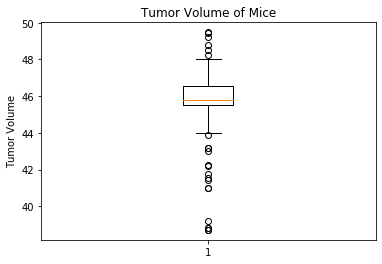

In [32]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
Tumor_Volume = filtered_df['Tumor Volume (mm3)']
fig1, ax1 = plt.subplots()
ax1.set_title('Tumor Volume of Mice')
ax1.set_ylabel('Tumor Volume')
ax1.boxplot(Tumor_Volume)
plt.show()

## Line and Scatter Plots

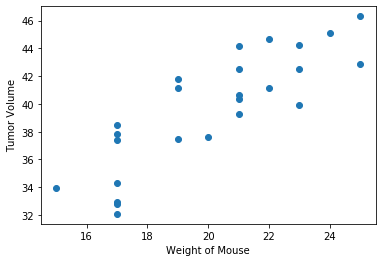

In [33]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
mouse_weight = Capomulin_df.groupby(Capomulin_df["Mouse ID"])["Weight (g)"].mean()
tumor_volume = Capomulin_df.groupby(Capomulin_df["Mouse ID"])["Tumor Volume (mm3)"].mean()

# Create Scatter Plot with values calculated above
plt.scatter(mouse_weight,tumor_volume)
plt.xlabel("Weight of Mouse")
plt.ylabel("Tumor Volume")
plt.show()


## Correlation and Regression

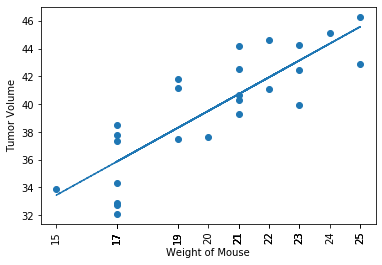

The correlation between weight and tumor value is 0.84


In [34]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
mouse_weight = Capomulin_df.groupby(Capomulin_df["Mouse ID"])["Weight (g)"].mean()
tumor_volume = Capomulin_df.groupby(Capomulin_df["Mouse ID"])["Tumor Volume (mm3)"].mean()

# Perform a linear regression on year versus violent crime rate
slope, int, r, p, std_err = st.linregress(mouse_weight, tumor_volume)
      
# Create equation of line to calculate predicted violent crime rate
fit = slope * mouse_weight + int

# Plot the linear model on top of scatter plot 
plt.scatter(mouse_weight,tumor_volume)
plt.xlabel("Weight of Mouse")
plt.ylabel("Tumor Volume")
plt.plot(mouse_weight,fit,"--")
plt.xticks(mouse_weight, rotation=90)
plt.show()

# Caculate correlation coefficient
corr = round(st.pearsonr(mouse_weight,tumor_volume)[0],2)
print(f'The correlation between weight and tumor value is {corr}')